<a href="https://colab.research.google.com/github/surbhishaw1602/Linear_Regression/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBARIES

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

LOAD DATASET

In [5]:
dataset=kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression")

100%|██████████| 457/457 [00:00<00:00, 472kB/s]

Extracting files...


In [6]:
os.listdir(dataset)

['Salary_dataset.csv']

In [7]:
data=pd.read_csv(f'{dataset}/Salary_dataset.csv')
data

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


DATA INFORMATION

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [9]:
data.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [10]:
print("Rows :",data.shape[0])
print("Columns :",data.shape[1])

Rows : 30
Columns : 3


In [11]:
data.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

MISSING VALUE CHECK

In [12]:
data.isnull().sum()

,0
Unnamed: 0,0
YearsExperience,0
Salary,0


REMOVE UNNECESSARY FEATURE

In [13]:
data=data.drop('Unnamed: 0',axis=1)

In [14]:
data

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


VISUALIZATION OF DATA

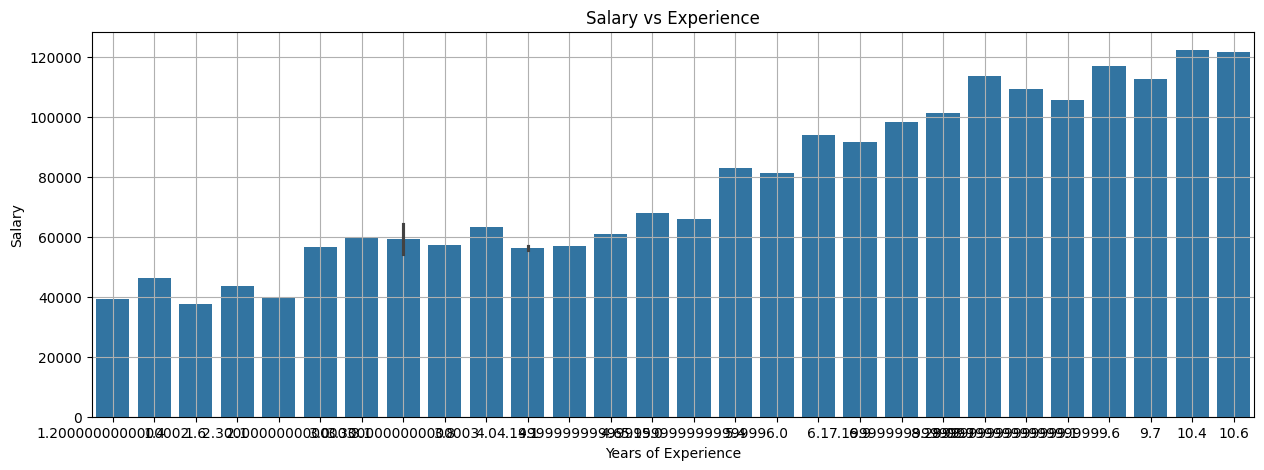

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(x='YearsExperience',y='Salary',data=data)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience")
plt.grid()
plt.show()

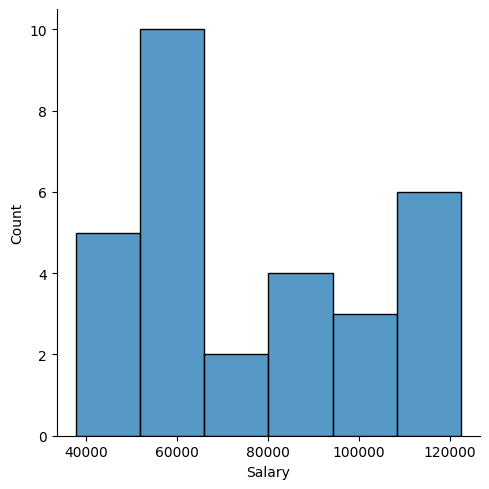

In [16]:
sns.displot(data['Salary'])

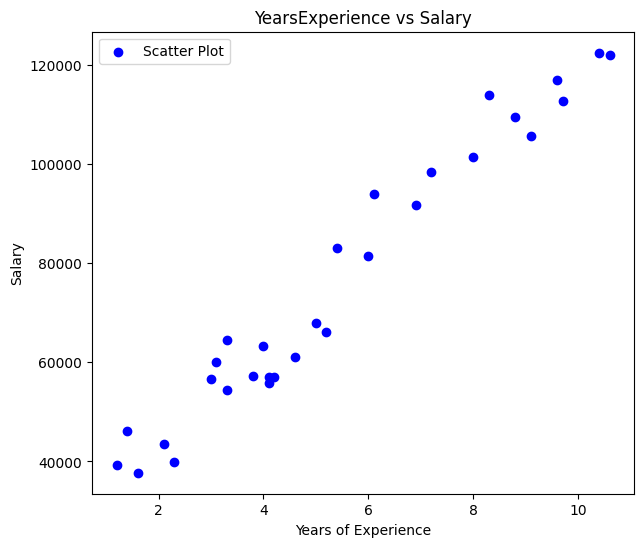

In [17]:

plt.figure(figsize=(7,6))
plt.scatter(data['YearsExperience'],y=data['Salary'],color='blue',label='Scatter Plot')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('YearsExperience vs Salary')
plt.legend()
plt.show()

<Axes: >

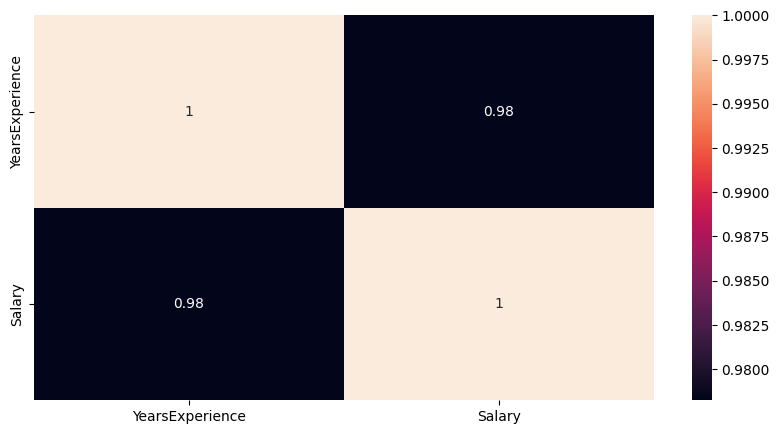

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)

FEATURE SELECTION

In [19]:
X=data[['YearsExperience']]
y=data['Salary']

In [22]:
print("X shape :",X.shape)
print("Y shape :",y.shape)


X shape : (30, 1)
Y shape : (30,)


In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
print("X_train:",X_train.shape)
print("X_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

X_train: (24, 1)
X_test : (6, 1)
y_train : (24,)
y_test : (6,)


MODEL BUILDING - LINEAR REGRESSION

In [25]:
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [26]:
y_pred=lr.predict(X_test)
a=lr.coef_
b=lr.intercept_


In [27]:
print("Model Slope :",a)
print("Model Intercept :",b)

Model Slope : [9423.81532303]
Model Intercept : 24380.201479473704


VISUALIZATION ON TRAINING DATA

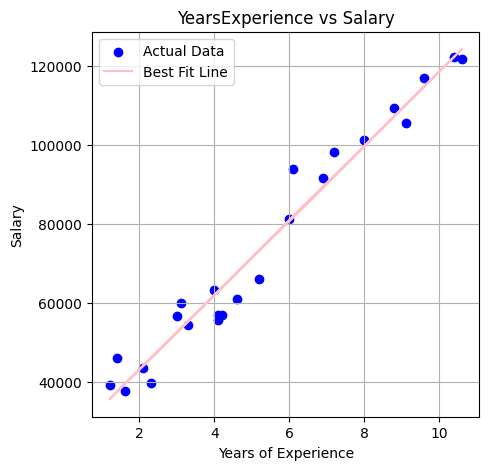

In [28]:
plt.figure(figsize=(5,5))
plt.scatter(X_train,y_train,color='blue',label='Actual Data')
plt.plot(X_train,lr.predict(X_train),color='pink',label='Best Fit Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('YearsExperience vs Salary')
plt.legend()
plt.grid()

VISUALIZATION ON TESTING DATA

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X_test,y_test,color='purple',label='Actual Data')
plt.plot(X_test,lr.predict(X_test),color='pink',label='Best Fit Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('YearsExperience vs Salary')
plt.legend()
plt.grid()

PERFORMANCE EVALUATION

In [29]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

In [30]:
print("MSE :",mse)
print("MAE :",mae)
print("RMSE :",rmse)
print("R2 Score ",r2)

MSE : 49830096.855908394
MAE : 6286.453830757745
RMSE : 7059.04362190151
R2 Score  0.9024461774180497


In [31]:
result=pd.DataFrame({
    'year of Experience (X)':X_test.values.ravel(),
    'Actual Salary (Y)':y_test.values,
    'Predicted Salary (Y_pred)':y_pred
})

result

,year of Experience (X),Actual Salary (Y),Predicted Salary (Y_pred)
0,9.7,112636.0,115791.210113
1,5.0,67939.0,71499.278095
2,8.3,113813.0,102597.868661
3,5.4,83089.0,75268.804224
4,3.3,64446.0,55478.792045
5,3.8,57190.0,60190.699707
